In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import yfinance as yf
from scipy import stats

C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 0 Introduction

In the financial sector here are 3 ways of making investment decisions to access the benefits and risks of a given financial asset.

The first analytical method is called <b>Fundamental Analysis</b>, where we predict the fair stock price by the intrinsic value of a company. The second analytical method is called <b>Technical Analysis</b> and contrary to the first method. It makes investment decisions based on historical data and patterns within the stock price. So all the information is contained within the stock and not the company. The price of the stock reflects the value of the company.

We are interested in the third method called <b>Quantitative Analysis</b>, which assumes that stock prices are random. With this assumption we would have to include randomness in our models and make use of stochastic calculus, stochastic differential equations and other mathematics/statistical methods to model the behavior of financial assets.

## 1 Stochastic Processes

A stochastic process is the mathematical description of temporally ordered and random processes. This ordere collection of random variables can be a discrete time process (e.g. Random Walk) or a continous time process (e.g. Brownian Motion).

### 1.1

A <b>Stochastic Process</b> is a collection $(X_{i})_{i \in I}$ of random variables $X_{i}$: $(\Omega, \mathcal{F}, P) \Rightarrow (S, \mathcal{B}(s))$ where:

- $\Omega$ is the set of relizations (informally also called outcomes).
- $S$ is the state space
- $\{ X_i (\omega) : i \in I \}$ is called sample path. (Often we also refer to the sample path as the realization of a stochastic process).

In the case of $I=\mathbb{N}$ we deal with <b>discrete time</b> and in the case of $I=\mathbb{R}_{+}$ we  deal with <b>continous time</b>.

### 1.2

<ins>Generally speaking</ins> $(X_n)$ is a <b>Martingale</b> w.r.t. $(\mathcal{G}_n)$ if
1. $(X_n)$ is adapted to the filtration $(\mathcal{G}_n)$
2. $E[X_{n+1}|\mathcal{G}_n] = X_n$

If we speak about $(X_n)$ being a Martingale, then we usually don't specify the filtration (because we assume it to be the natural filtration $\mathcal{F}$). Then only one condition needs to be fulfilled for $(X_n)$ being a Martingale, namely $E[X_{n+1}|\mathcal{F}_n] = X_n$ almost surely (a.s.)

In the case of $E[X_{n+1}|\mathcal{F}_n] = X_n$, we speak of a Martingale or a fair game. In the case of $E[X_{n+1}|\mathcal{F}_n] \leq X_n$, we speak of a <b>Supermartingale</b> or an unfavorable game. In the case of $E[X_{n+1}|\mathcal{F}_n] \geq X_n$, we speak of a <b>Submartingale</b> or a favorable game.

### 1.3
The process $X_n$ is a discrete-time <b>Markov chain</b> if $P(X_{n+1} \in B | \mathcal{F}_n) = P(X_{n+1} \in B | X_n)$ a.s. for all $B \subset S$. In other words: Given the past, the furture only depends on the present.

# 3 Random Walk

## 3.1 Introduction

- BM is a martingale (MDP) (Theorem 3.3.4)
- accumulates quadratc variation at rate one per unit time (3.4.3)


## 3.2 Scaled Random Walk

### 3.2.1 Symmetric Random Walk

We create a symmetric Random Walk by tossing a fair successively. The are 2 outcomes in that case, where the outcome T has a probability of $p=\frac{1}{2}$ and the outcome H has a probability of $q=1-p$. The outcome of the $n^{th}$ toss is stored by $\omega_{n}$.

$\text{Let}$

$$
X_{j} =
    \begin{cases} 1,& \text{if } \omega_{j} = H\\
    -1,& \text{if } \omega_{j} = T\\
    \end{cases}
$$

$\text{then we can define the symmetric Random Walk } M_{k} \text{ as}$

$$
M_{k} = \sum_{j=1}^{k} X_{j}
$$

$\text{where } M_{0}=0 \text{ and } \text{ k=1,2,3... } .$

The next figure visualizes a symmetric Random Walk:

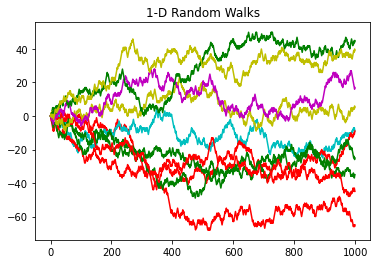

In [2]:
def rw1D(steps, p=0.5):
    """
    Generate a 1-dimensional random walk.

    Args:
    steps: The number of steps in the random walk.
    p: The probability of taking a step to the right.

    Returns:
    A NumPy array containing the steps of the random walk.
    """
    M = [(0,0)]  # Initialize the list of steps with the origin

    # Generate the random walk
    for k in range(1, steps):
        X_k = 1 if np.random.uniform(0,1) < p else -1
        M.append((k, M[k-1][1]+X_k))

    return np.array(M)  # Convert list to NumPy array for efficiency

def plot_rw1D(steps, p=0.5, col='b-'):
    """
    Generate and plot a 1-dimensional random walk.

    Args:
    steps: The number of steps in the random walk.
    p: The probability of taking a step to the right.
    col: The color and line style to use for the plot.
    """
    M = [(0,0)]  # Initialize the list of steps with the origin

    # Generate the random walk
    for k in range(1,steps):
        X_k = 1 if np.random.uniform(0,1) < p else -1
        M.append((k, M[k-1][1]+X_k))
    
    plt.plot(np.array(M)[:,0], np.array(M)[:,1], col)  # Plot the random walk

# Generate and plot 10 random walks
for _ in range(10):
    col = np.random.choice(['b-', '-g', '-r', '-c', '-m', '-y'])  # Pick a random color
    rw_1 = rw1D(1000, p=0.5)  # Generate a random walk
    plt.plot(rw_1[:,0],rw_1[:,1],col)  # Plot the random walk

plt.title("1-D Random Walks")  # Add a title to the plot
plt.show()  # Show the plot

In [3]:
num_of_losses = 0
num_of_tries = 10000
num_of_steps = 1000
p = 0.55
total_win = 0

for _ in range(num_of_tries):
    val = rw1D(num_of_steps, p=p)[-1,1]
    if val < 0:
        num_of_losses += 1
    total_win += val

    
average_win = total_win/num_of_tries
print(f'We ended up below 0 in {num_of_losses} out of {num_of_tries} number of tries, so {num_of_losses/num_of_tries}%.')
print(f'On average we ended up at {average_win} after {num_of_steps} number of steps.')

We ended up below 0 in 6 out of 10000 number of tries, so 0.0006%.
On average we ended up at 100.8338 after 1000 number of steps.


### 3.2.2 Increments of the Symmetric Random Walk

When we talk about *independent increments* of a Random Walk, then we mean the change in position of the Random Walk between $k_{i}$ and $k_{i+1}$, so

$$
M_{k_{i+1}} - M_{k_{i}} = \sum_{j=k_{i}+1}^{k_{i+1}} X_{j} \text{  .}
$$

Furthermore, we know

$$
E[M_{k_{i+1}} - M_{k_{i}}] = 0
$$

and

$$
Var[M_{k_{i+1}} - M_{k_{i}}] = \sum_{j=k_{i}+1}^{k_{i+1}} Var[X_{j}] = \sum_{j=k_{i}+1}^{k_{i+1}} 1 = k_{i+1} - k_{i}
$$

Word for word like book: "The variance of the symmetric walk accumulates at rate one per unit time, so that the variance of the increment over any time interval $k$ to $l$ for nonnegative integers $k<l$ is $l-k$."

### 3.2.3 Martingale Property for the symmetric Random Walk

- easy for discrete case. Just need to show $\mu=0$
- continous harder. We need to introduce filtration. Video series at: https://www.youtube.com/watch?v=aCFrBOed_7g&list=PLg5nrpKdkk2BZoZYAg2d6Ma3HZ5p9h35i&index=6


### 3.2.3 Scaled Symmetric Random Walk

So far we've looked at the symmetric random walk. If we want to get to a Brownian Motion from here, then we need to make infinitely many steps between any chosen interval. The result then is a Brownian Motion. To do that we first need to speed up time and scale down the step size of a symmetric random walk. We do that by
$$
W^{(n)}(t) = \frac{1}{\sqrt{n}} M_{nt}
$$
where $nt$ is an integer. If that is not the case, then we need to look at $s$ as the left nearest point of $t$ and $u$ as the right nearest point of $t$ respectively. We then approximate nt by linear interpolation like
$$
y = f(x_{1}) + \frac{f(x_{2}) - f(x_{1})}{x_{2} - x_{1}} (x - x_{1})
$$
or in our case:
$$
nt = ns + \frac{nu - ns}{u - s} (t - s)
$$

In [4]:
def linear_interpolation(s, u, ns, nu, t):
    """
    Compute the linear interpolation between two points.

    Args:
    s: The x-coordinate of the first point.
    u: The x-coordinate of the second point.
    ns: The y-coordinate of the first point.
    nu: The y-coordinate of the second point.
    t: The x-coordinate at which to interpolate.

    Returns:
    The y-coordinate at x = t.
    """
    return ns + ((nu - ns) / (u - s)) * (t - s)


def ssrw1D(n, T, p=0.5):
    """
    Generate a scaled symmetric 1-dimensional random walk.

    Args:
    n: The number of steps in the random walk.
    T: The maximum x-coordinate.
    p: The probability of taking a step to the right.

    Returns:
    A NumPy array containing the steps of the random walk.
    """
    M = rw1D(n*T, p=0.5)
    W = np.array(list(zip((1/n) * M[:,0], float(1 / np.sqrt(n)) * M[:,1])))
    
    return W

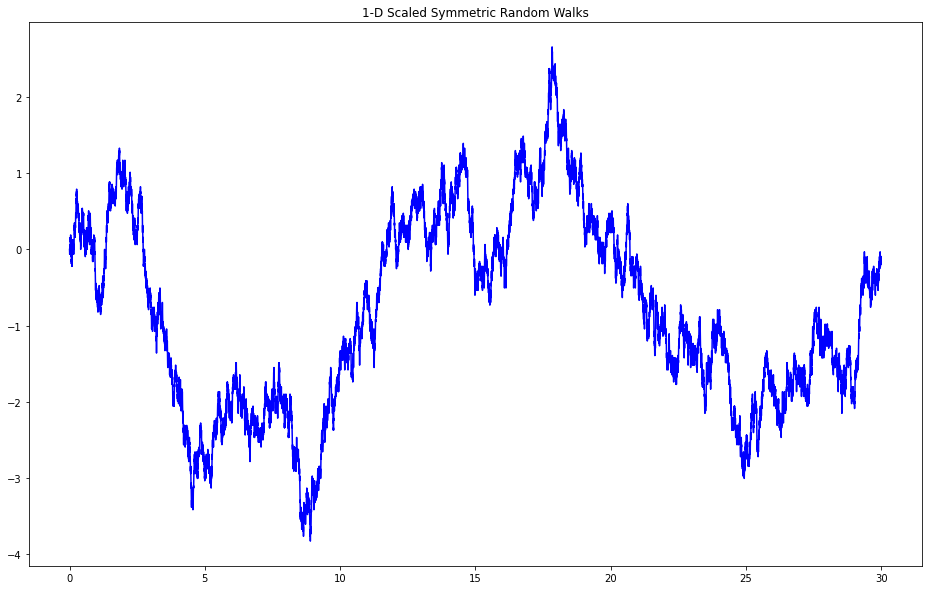

In [5]:
plt.figure(figsize=(16, 10))

# Generate and plot a random walk
col = 'b-'
ssrw_1 = ssrw1D(n=1000, T=30, p=0.5)
plt.plot(ssrw_1[:,0], ssrw_1[:,1], col)

plt.title("1-D Scaled Symmetric Random Walks")
plt.show()

### Filtration

https://www.youtube.com/watch?v=qTg0mqxuGeA&list=PLckXXkZv3lYhTgR-3Pxc5kvUMR8sbS074&index=9

at 22:40 you can see the definition of a filtration (examples have been given before that)

We are given a probability space $(\Omega, \mathcal{F}, \mathbb{P})$ and let $T>0$. Assume that for $0 \leq t \leq T$ there exists a $\sigma$-algebra $\mathcal{F}(t)$ s.t. $\mathcal{F}(t) \subset \mathcal{F}$ and whenever $s \leq t$ then $\mathcal{F}(s) \subseteq \mathcal{F}(t)$. Then $\{ \mathcal{F}(t) \}_{0 \leq t \leq T}$ is called a filtration, associated with $(\Omega, \mathcal{F}, \mathbb{P})$.

<ins>Upside of Filtration</ins>:
"As a random experiment progresses and new information gets available, you know which part of the $\sigma$-algebra you already know." (from video)


An examples should help to understand the definition of a filtration:

Suppose we throw a fair coin 3 times, then the possible outcomes are given by
$$\{ HHH, HHT, HTH, HTT, THH, THT, TTH, TTT\}$$


If we reveal the <ins>first</ins> outcome, then there are $2^{1}$ possibilities:

$$A_{H} = \{ HHH, HHT, HTH, HTT \}, A_{T} = \{ THH, THT, TTH, TTT \}$$

We now create the $\sigma$-algebra $\mathcal{F}_{1}$ and observe $\mathcal{F}_{1} = \{  \emptyset, \Omega, A_{H}, A_{T}\}$

If we reveal the <ins>second</ins> outcome, then there are $2^{2}$ possibilities:

$$A_{HH} = \{ HHH, HHT \}, A_{HT} = \{ HTH, HTT \}, A_{TH} = \{ THH, THT \}, A_{TT} = \{ TTH, TTT \}$$

We now create the $\sigma$-algebra $\mathcal{F}_{2}$ and observe
$$\mathcal{F}_{2} = \{ \emptyset, \Omega, A_{H}, A_{T}, A_{HH}, A_{HT}, A_{TH}, A_{TT}, A_{HH}^{c}, A_{HT}^{c}, A_{TH}^{c}, A_{TT}^{c}, A_{HH} \cup A_{TT}, A_{HH} \cup A_{TH}, A_{HT} \cup A_{TH}, A_{HT} \cup A_{TT} \}$$

We notice the pattern and get $\mathcal{F}_{0} = \{ \emptyset, \Omega \}$ and $\mathcal{F}_{3} = \mathcal{F}$. By that we notice another pattern, namely

$$\mathcal{F}_{0} \subset \mathcal{F}_{1} \subset \mathcal{F}_{2} \subset \mathcal{F}_{3} = \mathcal{F}$$

This sequence of $\sigma$-algebras where (informally) $\mathcal{F}_{i}$ contains $\mathcal{F}_{i-1}$ is called a filtration.

### Martingale

Assume we are given a filtration $\{ \mathcal{F}_{n} \}_{n=0}$ and a stochastic process $\{ X_{n} \}_{n=0}^{N}$ adapted to the given filtration. Then we call $\{ X_{n} \}$ a <ins>discrete martingale</ins> if 
$$
E[X_{n+1}|\mathcal{F}_{n}] = X_{n}
$$
.

We can extend that idea to $E[X_{n+2}|\mathcal{F}_{n+1}] = X_{n+1}$ and plug it into the definition of a discrete martingale to observe $E[E[X_{n+2}|\mathcal{F}_{n+1}]|\mathcal{F}_{n}] = X_{n}$ (tower law).

To define a <ins>continous martingale</ins>, we take a continous stochastic process $X(t)$ and a filtration $\mathcal{F}(s)$ that need to fulfill
$$
E[X(t)|\mathcal{F}(s)] = X(s) , \text{ where } s \leq t
$$

<ins>Property of martingale</ins>:
$$
E[X_{n}] = \int_{\Omega} X_{n} d \mathbb{P} = \int_{\Omega} E[X_{n+1}|\mathcal{F}_{n}] d \mathbb{P} = \int_{\Omega} X_{n+1} d \mathbb{P} = E[X_{n+1}]
$$
So we have, that
$$
E[X_{0}] = E[X_{1}] = E[X_{2}] =  E[X_{3}] ...
$$

### Symmetric Random Walk

https://www.youtube.com/watch?v=4-Tas6Uw_OQ&list=PLckXXkZv3lYhTgR-3Pxc5kvUMR8sbS074&index=10



- forms a discrete martingale (show that)
- Scaled Symmetric Random Walk is an n-th level approximaiton of a Brownian Motion. As n tends to infinity, the Scaled Symmetric Random Walk converges (almost surely) to a Brwonian Motion.  

### Brownian Motion

https://www.youtube.com/watch?v=8aesZvl_P_k

A stochastic process $ \{ W(t) \}_{t \geq 0}$ with $W(0)=0$ is a <b>Brownian motion</b> if given any time points $$0 = t_0 < t_1 < t_2 < ... < t_n$$ the increments $$W(t_1) - W(t_0), W(t_2) - W(t_1), ... , W(t_n) - W(t_{n-1})$$ are independent random variables and $$W(t_{i+1}) - W(t_{i})$$ follows a normal distribution like $$N(0, t_{i+1}-t{i}) \text{ for every } i=0,1,..., n-1.$$

Now we have to define a <b>Filtration for the Brownian Motion</b>. $\{ \mathcal{F} (t) \}_{t \geq 0} \text{is a collection of } \sigma \text{-algebras s.t.}$

i) $0 \leq s \leq t $, then $\mathcal{F}(s) \subset \mathcal{F}(t)$

ii) $\{ W(t) \}$ must be adapted to the filtration

iii) $0 \leq t < u $, then $W(n)-W(t)$ is independent of $\mathcal{F} (t)$

Note: We can call $\mathcal{F}(t)$ the smallest $\sigma$-algebra generated by the Brownian motion up to $t$.

Proof that the <b>Brownian Motion is a Martingale</b>:

For that we need to show that $E[W(t)|\mathcal{F}(s)]=W(s)$.

$$
E[W(t)|\mathcal{F}(s)] = E[(W(t)-W(s))+W(s)|\mathcal{F}(s)] = E[W(t)-W(s)|\mathcal{F}(s)] + E[W(s)|\mathcal{F}(s)] \buildrel \rm by (iii) \over = E[W(t)-W(s)] +  E[W(s)] = 0 + W(s) = W(s)
$$

In financial applications we're interested in a special kind of martingale, namely the <b>Exponential Martingale</b>:
$$

_________________________________________________________________

Probability Theory - Part 11 - Distribution of a Random Variable

https://www.youtube.com/watch?v=UOp3kFj0slo

I need to further understand measure theory. But before diving into that, I should probably just continue the lecture series by Prof. Joydeep Dutta (BM 2+3).

## 4 Brownian Motion

https://www.youtube.com/watch?v=PPl-7_RL0Ko&t=408s

There's a connection between the Scaled Symmetric Random Walk (SSRW) and the Brownian Motion (BM). SSRW is the discrete time process $W^{(n)}(t)$ and as $n \rightarrow \infty$, we're able to transform this discrete time process to a continous one. This resulting continous time process is then called <b>Brownian Motion</b>.

To see how we can get from a discrete time process (with linear interpolation between points) to a continous time process, run the code below. (Due to the linear interpolation between points its technically already continous, but you get the idea.)

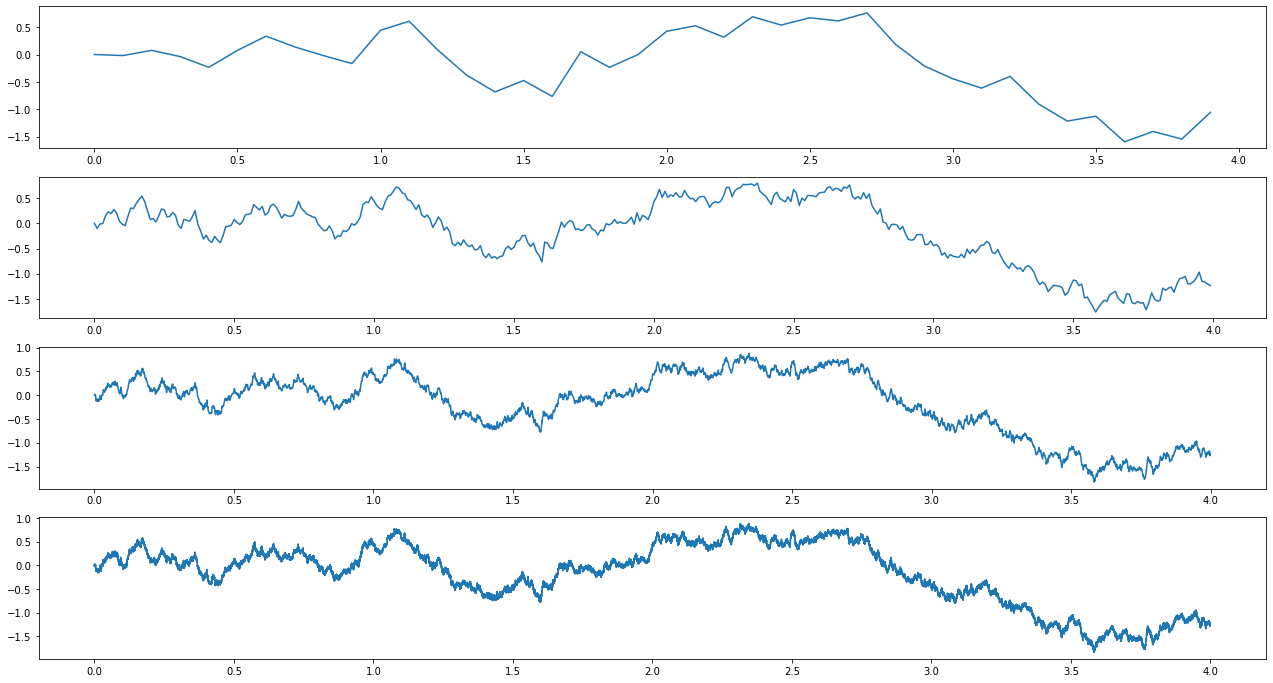

In [6]:
T=4

bm_1 = ssrw1D(n=100000, T=T, p=0.5)
fig, axs = plt.subplots(4, figsize=(22, 12))

for i, n in enumerate([10000, 1000, 100, 1]):
    x = bm_1[:,0][0::n].copy().tolist()
    y = bm_1[:,1][0::n].tolist()
    axs[i].plot(x, y)
    
plt.show()

Brownian Motion has the property, that it's not differentiable anywhere. This gets clearer if we zoom into the picture a bit.

[5.0, 20, 200, 400]


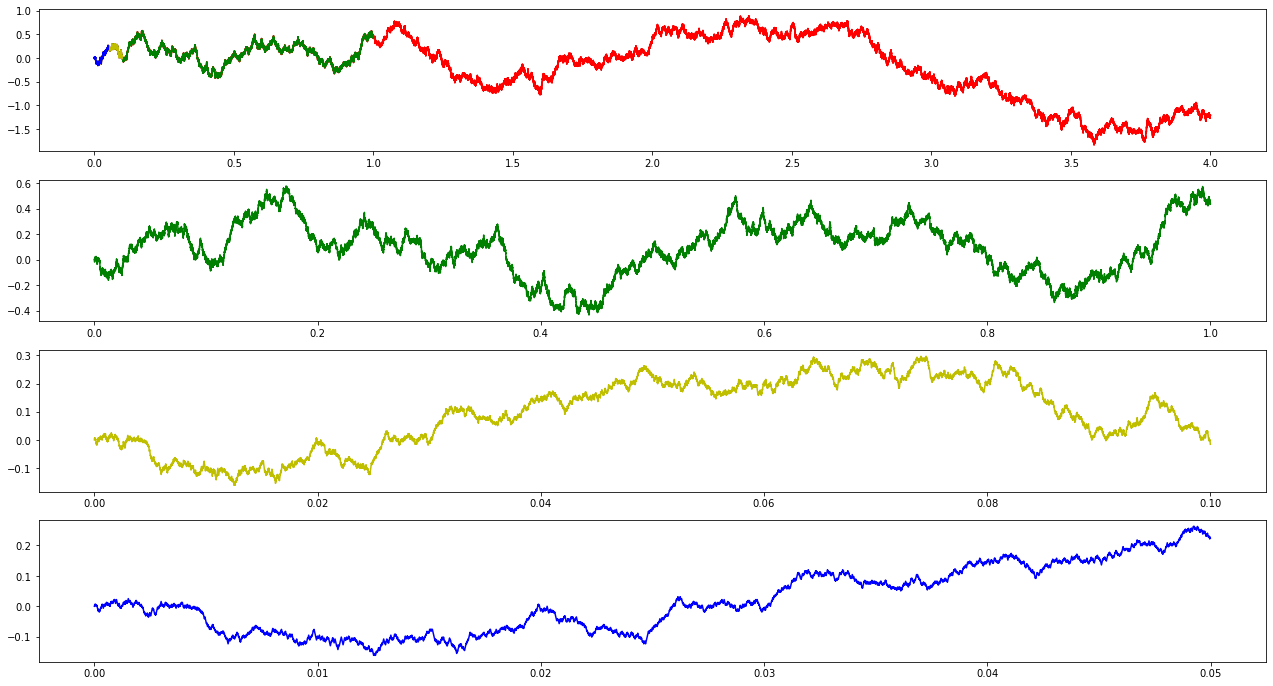

In [7]:
bm_2 = ssrw1D(n=5*100000, T=T, p=0.5)
fig, axs = plt.subplots(4, figsize=(22, 12))
cut_off_list = [elem*T*5 for elem in [0.25, 1, 10, 20]]
print(cut_off_list)

for i, cut_off in enumerate(cut_off_list):
    col = ['r', '-g', '-y',  '-b']
    x = bm_1[:int(len(bm_2)/cut_off),0].copy().tolist()
    y = bm_1[:int(len(bm_2)/cut_off),1].copy().tolist()
    axs[0].plot(x, y, col[i])
    axs[i].plot(x, y, col[i])
    
plt.show()

Now we can define the Brownian Motion more formally:

A Stochastic Process $\{ W (t)\}_{t \geq 0}$ with $W(0) = 0$ is called <b>Brownian Motion</b> (often also <b>Wiener Process</b>) if given any time periods $0=t_0 <t_1 <t_2 < ... <t_n$ the increments $W(t_1)-W(t_0), W(t_2)-W(t_1), ... ,W(t_n)-W(t_{n-1})$ are independent random variables and $W(t_{i+1})-W(t_i) \sim N(0,t_{i+1}-t_i)$ for every $i=0$.

- Brownian Motion is a Martingale. Proof: (later)

------------------------------------------------

A very important type of Martingale is the <b>Exponential Martingale</b>. It's defined as follows:
$$
Z(t) := exp\{ \sigma W(t) - \frac{1}{2} \sigma^2 t \}, \text{ with } \sigma>0
$$

To <b>proof</b>, that $Z(t)$ is a Martingale, we need to show that $E[Z(t)|\mathcal{F}(s)] = Z(s), \text{ for } 0 \leq s \leq t$ :

$$
E[Z(t)|\mathcal{F}(s)] =
E[exp\{ \sigma W(t) - \frac{1}{2} \sigma^2 t \}|\mathcal{F}(s)] =
E[exp\{ \sigma (W(t) - W(s))\} exp\{ \sigma W(s) - \frac{1}{2} \sigma^2 t\}|\mathcal{F}(s)]
$$

$$
E[Z(t)|\mathcal{F}(s)] =
E[exp\{ \sigma W(t) - \frac{1}{2} \sigma^2 t \}|\mathcal{F}(s)] =
E[exp\{ \sigma (W(t) - W(s))\} exp\{ \sigma W(s) - \frac{1}{2} \sigma^2 t\}|\mathcal{F}(s)]
$$

$$
\text{ we take out what is known and get }
$$

$$
exp\{ \sigma (W(t) - W(s))\} E[exp\{ \sigma (W(t) - W(s))\}|\mathcal{F}(s)]
$$

$$
\text{ independence then gives us  ...}
$$


----------------------------------------------

#### Quadratic Variation of $\{ W(t)\}$

A very important property of the Brownian Motion is its Quadratic Variation. To understand this property, we go back to the Symmetric Random Walk example and want to understand its Quadratic Variation up to $t$. Then the Quadratic Variation of the Random Walk up to $t$ is given by:
$$
\sum_{j=1}^{t} (S_{j}-S_{j-1})^2
$$

$$
\text{using that } (S_{j}-S_{j-1})=X_j \text{ whcih will either be 1 or -1, we get}
$$

$$
\sum_{j=1}^{t} (S_{j}-S_{j-1})^2 = \sum_{j=1}^{t} 1 = t
$$

This is an important property that also holds for the Brownian Motion. To show that, we first look at the Scaled Symmetric Random Walk $W^{(n)}(t) = \frac{1}{\sqrt{n}} M_{nt}$ and define its quadratic variation up to $t$ like:

$$
\left[W^{(n)}, W^{(n)}\right] (t) = \sum_{j=1}^{nt} \left[ W^{(n)} \left(\frac{j}{n}\right) - W^{(n)} \left(\frac{j-1}{n}\right)\right]^2
$$

$$
\text{using that an increment at index j of the SSRW is } \frac{1}{\sqrt{n}} X_j \text{, we get}
$$

$$
\sum_{j=1}^{nt} \left[ \frac{1}{\sqrt{n}} X_j \right]^2 = \sum_{j=1}^{nt} \frac{1}{n} = t
$$

If we now make $n$ infinitely large, we get the Quadratic Variation of the Brownian Motion up to $t$, which is
$$
\lim_{n \rightarrow \infty} \left[W^{(n)}, W^{(n)}\right] (t) = \lim_{n \rightarrow \infty} \sum_{j=1}^{nt} \frac{1}{\sqrt{n}} =
\lim_{n \rightarrow \infty} t = t
$$

We can also check that visually for a SSRW with large $n$ and get:

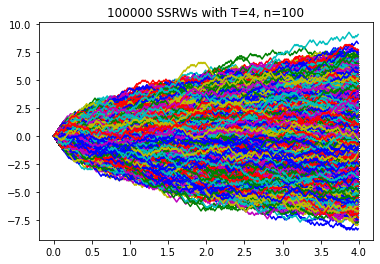

In [8]:
WT_list = list()
for _ in range(100000):
    col = np.random.choice(['b-', '-g', '-r', '-c', '-m', '-y'])
    bm_1 = ssrw1D(n=100, T=T, p=0.5)
    WT_list.append(float(bm_1[-1][1]))
    plt.plot(bm_1[:,0],bm_1[:,1],col)
    
plt.title("100000 SSRWs with T=4, n=100")
plt.show()

mu: -0.006
var: 4.0


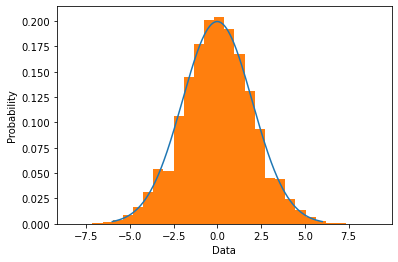

In [9]:
mu = np.mean(WT_list)
var = np.var(WT_list)
sigma = np.sqrt(var)

print(f'mu: {round(mu, 3)}')
print(f'var: {round(var, 3)}')

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.hist(WT_list, density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

---------------------------

## Geometric Brownian Motion

https://www.youtube.com/watch?v=y4VFtCStgFI&list=PL1BaGV1cIH4UXkZgrX2TtXhvUQW6_4hZF&index=8

Can be described in the following way:
$$
\frac{\Delta S}{S} = \mu \Delta t + \sigma \epsilon \sqrt{\Delta t}
$$
$$
\iff \Delta S = \mu S \Delta t + \sigma S \epsilon \sqrt{\Delta t}
$$

where $\Delta S$ is the change in the stock price S, $\mu$ is the expected rate of return, $\sigma$ is the volatility of the stock and $\epsilon$ is a standard normal.